In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Data source = https://catalog.data.gov/dataset/under-age-65-disability-diagnoses-of-supplemental-security-income-ssi-recipients-by-census
# Addtional information = https://www.ssa.gov/policy/docs/data/ssi-2010/SSI-2010-User-Manual.pdf

In [3]:
# File path for first csv 
ssi_data = "ssi_data.csv"
# Read our first csv into Pandas as a dataframe 
ssi_data_df = pd.read_csv(ssi_data)

In [4]:
# Inspect for column names
ssi_data_df.columns

Index(['CENSUS REGION', 'DIAG. GROUP', 'AGE  ', 'SEX', 'RECIPIENTS'], dtype='object')

In [5]:
ssi_data_df.head(10)

,CENSUS REGION,DIAG. GROUP,AGE,SEX,RECIPIENTS
0,Midwest,AUTISTIC,<12,F,2328
1,Midwest,AUTISTIC,<12,M,10433
2,Midwest,AUTISTIC,13-17,F,872
3,Midwest,AUTISTIC,13-17,M,3923
4,Midwest,AUTISTIC,18-21,F,1164
5,Midwest,AUTISTIC,18-21,M,5282
6,Midwest,AUTISTIC,22-25,F,758
7,Midwest,AUTISTIC,22-25,M,3201
8,Midwest,AUTISTIC,26-29,F,381
9,Midwest,AUTISTIC,26-29,M,1310


In [6]:
# Clean data 

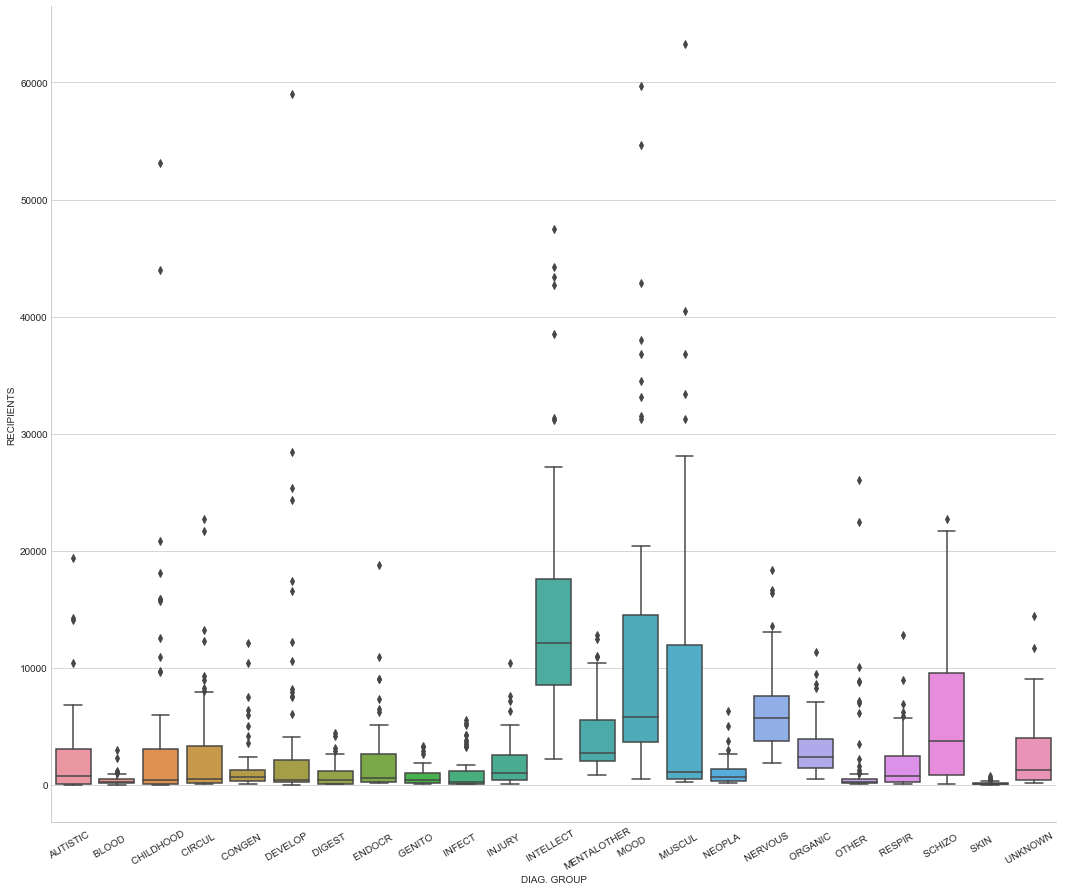

In [7]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,15))
g = sns.boxplot(x="DIAG. GROUP", y="RECIPIENTS", data=ssi_data_df, ax=ax)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
sns.despine()
# Save the figure as png image
plt.savefig("diagnosis_ssi.png")
plt.show()


In [10]:
#fig, ax = plt.subplots(figsize=(8,5))
#sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,15))
sns.factorplot(x="AGE  ", y="RECIPIENTS", data=ssi_data_df, fit_reg=False, hue='DIAG. GROUP', legend=True, ax=ax)
#g.set_xticklabels(g.get_xticklabels(),rotation=30)
sns.despine()


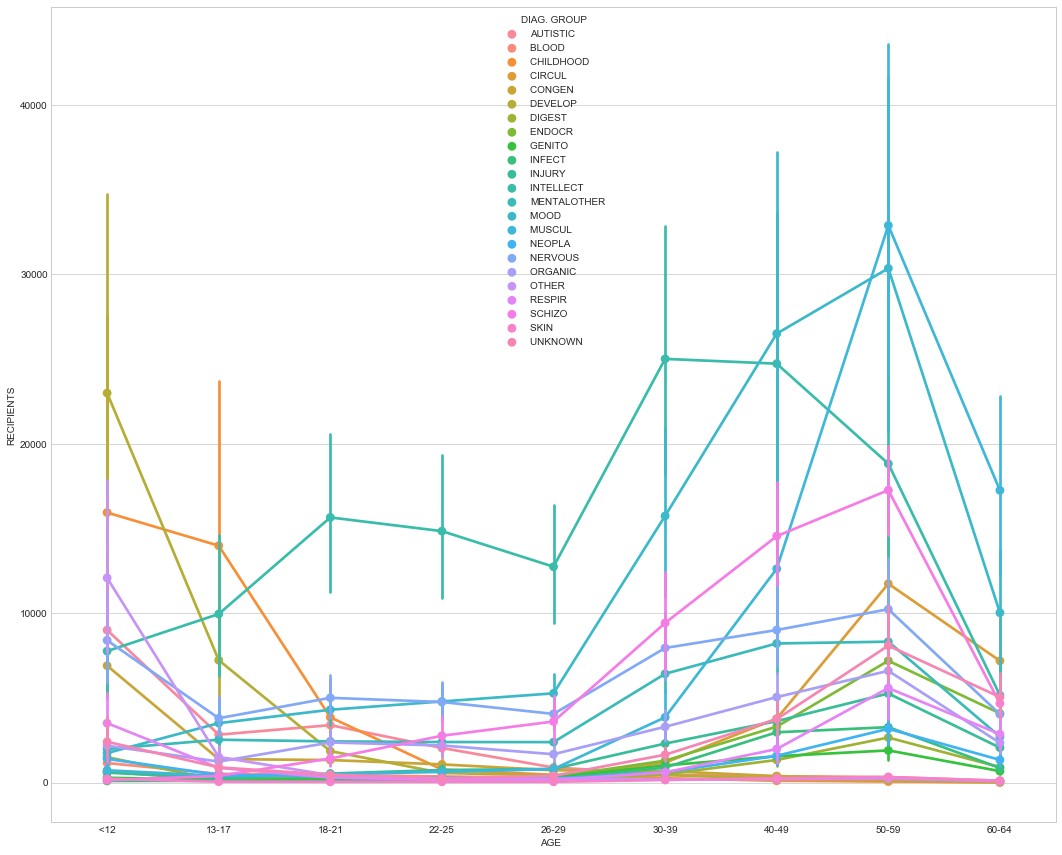

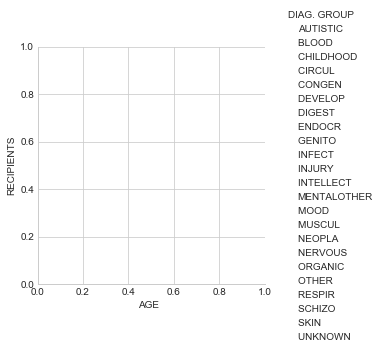

In [11]:
# Save the figure as png image
plt.savefig("age_ssi.png")
plt.show()

In [9]:
# plt.scatter(ssi_data_df["DIAG. GROUP"],
            #ssi_data_df["CENSUS REGION"],
            #linewidths=1, marker="o",
            #alpha=0.4, label="?")

# Label the graph and set axis limits
#plt.title("title")
#plt.ylabel("y")
#plt.xlabel("x")
#plt.grid(True)
#plt.xlim([-90,90])

# Show plot
#plt.show()